## EarthLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    bucket_and_bin, 
    speed_breakdown, 
    unserved
)

In [3]:
# inputs
fn_earthlink = '../data/output/speed_price_earthlink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_el.csv'

In [20]:
el = pd.read_csv(fn_earthlink, compression='gzip')

In [21]:
len(el)

565752

In [22]:
el[['major_city', 'state']].nunique()

major_city    34
state         35
dtype: int64

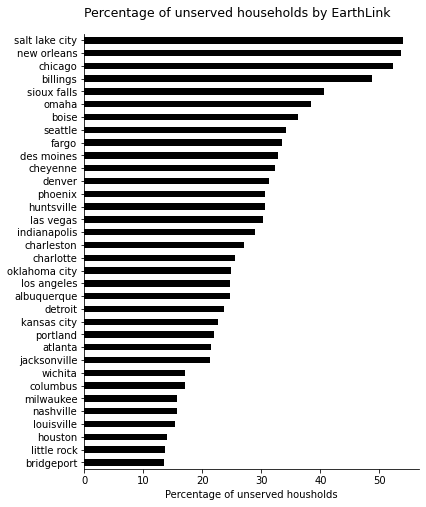

In [7]:
unserved(el, isp='EarthLink', height=8)

In [9]:
len(el[el.speed_down == 0]) / len(el)

0.28099061072696163

In [7]:
# which ISPs are being leased in each city?
el.groupby(['major_city', 'state']).contract_provider.value_counts()

major_city      state  contract_provider
albuquerque     NM     CenturyLink          10542
atlanta         GA     AT&T                  9208
billings        MT     CenturyLink           1975
boise           ID     CenturyLink           4278
bridgeport      CT     Frontier              3167
                       AT&T                     3
                       CenturyLink              1
charleston      SC     AT&T                  3132
                WV     Frontier              1296
charlotte       NC     AT&T                 15222
cheyenne        WY     CenturyLink           1413
chicago         IL     AT&T                 27829
columbus        OH     AT&T                 22597
denver          CO     CenturyLink          11566
des moines      IA     CenturyLink           4519
detroit         MI     AT&T                 19763
                       CenturyLink              2
fargo           ND     CenturyLink           1630
houston         TX     AT&T                 45981
huntsvill

In [25]:
# throw out Frontier-leased offers and no service
el = el[el['contract_provider'].isin(['AT&T', 'CenturyLink'])]
el = el[el['speed_down'] != 0]

In [26]:
el = el[el.major_city != 'bridgeport']

In [27]:
el.major_city.nunique()

33

In [28]:
len(el)

398401

In [29]:
el = bucket_and_bin(el)

In [30]:
el.speed_down.describe()

count    398401.000000
mean         50.874554
std          40.031391
min           3.000000
25%          12.000000
50%          45.000000
75%         100.000000
max         100.000000
Name: speed_down, dtype: float64

In [31]:
el[el.speed_down == 100].price.max() / 100

0.5995

In [32]:
el[el.speed_down == 3].price.max() / 3

19.983333333333334

In [44]:
variety = el.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
to_skip = variety[variety >= .95].index.get_level_values(0)

In [45]:
# who has options?
el[(el['speed_down'] != el['fastest_speed_down']) &
   (~el['fastest_speed_down'].isnull())]['speed_down_bins'].value_counts(normalize=True)

Fast (100-199)     0.559759
Slow (<25 Mbps)    0.439952
Medium (25-99)     0.000289
No service         0.000000
Blazing (≥200)     0.000000
Name: speed_down_bins, dtype: float64

In [46]:
can_upgrade = el[(el['speed_down'] != el['fastest_speed_down']) &
                (~el['fastest_speed_down'].isnull())]

In [47]:
to_skip

Index(['albuquerque', 'billings', 'boise', 'cheyenne', 'denver', 'des moines',
       'fargo', 'las vegas', 'omaha', 'phoenix', 'portland', 'salt lake city',
       'seattle', 'sioux falls'],
      dtype='object', name='major_city')

In [57]:
el[el.major_city == 'columbus'].contract_provider.value_counts()

AT&T    22597
Name: contract_provider, dtype: int64

In [63]:
el[el.contract_provider == 'AT&T'].price.value_counts(normalize=True)

59.95    0.937083
54.95    0.062917
Name: price, dtype: float64

In [65]:
el[(el.contract_provider == 'AT&T') & 
   (el.price == 54.95)].major_city.value_counts()

columbus     16582
nashville     1409
Name: major_city, dtype: int64

In [68]:
columbus = el[el.major_city.isin(['nashville', 'columbus'])] #.price.value_counts()

In [69]:
columbus.price.value_counts(normalize=True)

54.95    0.583328
59.95    0.416672
Name: price, dtype: float64

In [70]:
columbus[columbus.price == 59.95].speed_down.value_counts(normalize=True)

100.0    0.903509
6.0      0.065909
3.0      0.030581
Name: speed_down, dtype: float64

In [71]:
columbus[columbus.price == 54.95].speed_down.value_counts(normalize=True)

12.0    1.0
Name: speed_down, dtype: float64

In [48]:
el[~el.major_city.isin(to_skip)].contract_provider.value_counts(normalize=True)

AT&T           0.999948
CenturyLink    0.000052
Name: contract_provider, dtype: float64

In [51]:
el[(~el.major_city.isin(to_skip)) & (el.contract_provider == 'CenturyLink')]

,address_full,incorporated_place,major_city,state,lat,lon,availability_status,block_group,collection_datetime,provider,...,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,income_level,speed_down_bins,race_quantile,is_slow
110353,"1622 Johnson St Jacksonville, AR 72076",Jacksonville city,jacksonville,FL,30.344671,-81.668827,NaN,120310016002,1650685008,EarthLink,...,0.313176,1182.115291,3.0,38140.0,0.406667,17391.0,Low,Slow (<25 Mbps),least white,1
111041,"105 Lee Ave Jacksonville, AR 72076",Jacksonville city,jacksonville,FL,30.324788,-81.535964,NaN,120310146042,1650719701,EarthLink,...,0.638796,1520.496638,3.0,20058.0,0.740941,35473.0,Low,Slow (<25 Mbps),more white,1
116440,"1704 Hill Rd Jacksonville, AR 72076",Jacksonville city,jacksonville,FL,30.327455,-81.633405,NaN,120310174002,1650516713,EarthLink,...,NaN,53.103302,4.0,NaN,0.660714,NaN,NaN,Slow (<25 Mbps),least white,1
121781,"1113 Hendricks Ct Jacksonville, NC 28540",Jacksonville city,jacksonville,FL,30.314334,-81.654694,NaN,120310008001,1650508818,EarthLink,...,1.142281,1373.322050,4.0,-7901.0,0.965022,63432.0,Middle-Upper,Slow (<25 Mbps),most white,1
132228,"706 Dewitt St Jacksonville, NC 28540",Jacksonville city,jacksonville,FL,30.335367,-81.672780,NaN,120310172001,1650555656,EarthLink,...,0.768976,658.251386,4.0,12829.0,0.867227,42702.0,Middle-Lower,Slow (<25 Mbps),less while,1
132492,"210 Druid Ct Jacksonville, NC 28546",Jacksonville city,jacksonville,FL,30.325686,-81.717441,NaN,120310121001,1650557383,EarthLink,...,0.522789,178.001926,3.0,26500.0,0.672783,29031.0,Low,Slow (<25 Mbps),more white,1
273970,"6424 N Detroit Ave Portland, OR 97217",Detroit city,detroit,MI,42.301306,-83.102623,NaN,261635250003,1651312909,EarthLink,...,NaN,202.980600,2.0,NaN,0.528736,NaN,NaN,Slow (<25 Mbps),less while,1
273971,"6351 N Detroit Ave Portland, OR 97217",Detroit city,detroit,MI,42.301496,-83.100956,NaN,261635250003,1651521949,EarthLink,...,NaN,202.980600,2.0,NaN,0.528736,NaN,NaN,Slow (<25 Mbps),less while,1
296874,"12750 N Winan Ave Kansas City, MO 64163",Kansas City city,kansas city,MO,39.324050,-94.697939,NaN,291650306006,1652796102,EarthLink,...,1.203101,32.116350,5.0,-11410.0,0.899658,67589.0,Middle-Upper,Slow (<25 Mbps),most white,1
298373,"11700 NW Plaza Cir Kansas City, MO 64153",Kansas City city,kansas city,MO,39.304637,-94.685000,NaN,291650302011,1650675902,EarthLink,...,1.931327,90.170086,4.0,-52321.0,0.976705,108500.0,Upper Income,Slow (<25 Mbps),most white,1


In [49]:
can_upgrade.speed_down_bins.value_counts()

Fast (100-199)     133872
Slow (<25 Mbps)    105219
Medium (25-99)         69
No service              0
Blazing (≥200)          0
Name: speed_down_bins, dtype: int64

In [37]:
for _, _df in can_upgrade.groupby('speed_down_bins'):
    if _df.empty:continue
    print(_)
    print(_df.fastest_speed_down.value_counts(normalize=True))

Slow (<25 Mbps)
1000.0    0.410354
100.0     0.141904
80.0      0.117289
40.0      0.109229
45.0      0.068562
75.0      0.057385
60.0      0.053289
24.0      0.027913
18.0      0.010511
30.0      0.003564
Name: fastest_speed_down, dtype: float64
Medium (25-99)
60.0    1.0
Name: fastest_speed_down, dtype: float64
Fast (100-199)
1000.0    0.50939
5000.0    0.49061
Name: fastest_speed_down, dtype: float64


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


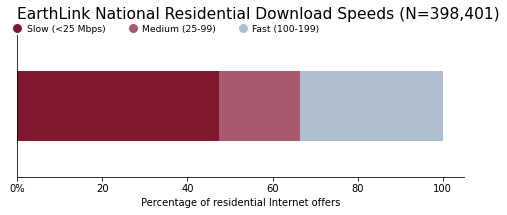

In [38]:
speed_breakdown(el, isp='EarthLink')

In [22]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in el.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

<ipython-input-22-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-22-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-22-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-22-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-22-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [23]:
# filter out cities with only slow speeds
el = el[~el.major_city.isin(to_skip)]

In [24]:
len(el), el.major_city.nunique()

(285962, 19)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


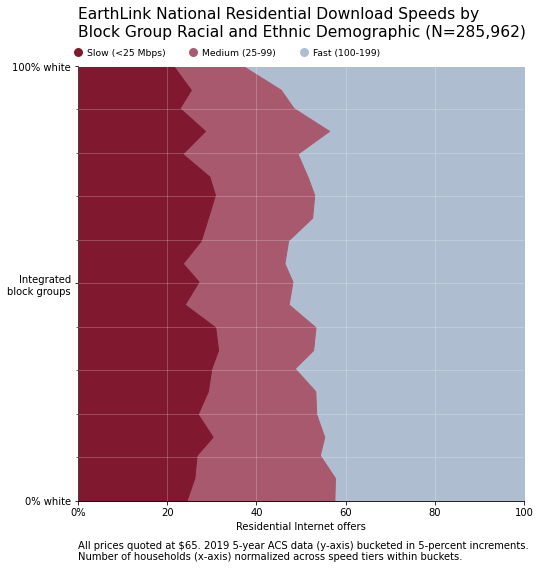

In [25]:
plot_race(el, isp='EarthLink', price='$65')

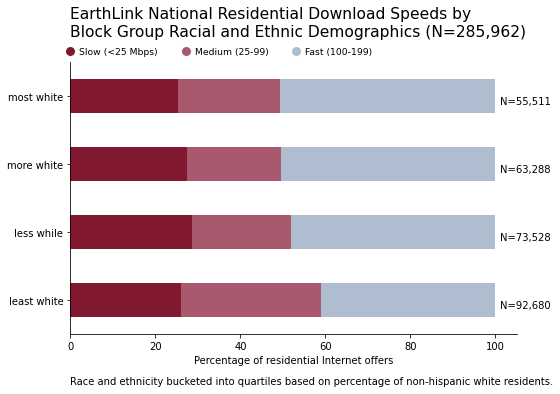

In [26]:
race(el, isp='EarthLink')

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


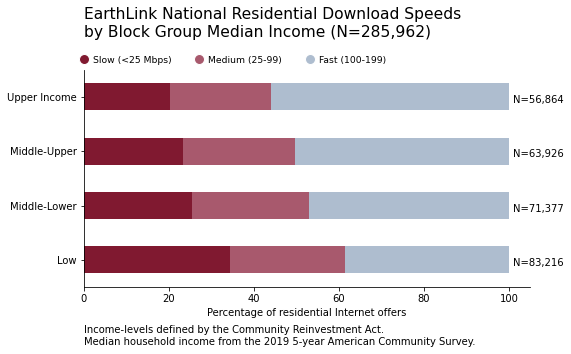

In [27]:
income(el, isp='EarthLink')

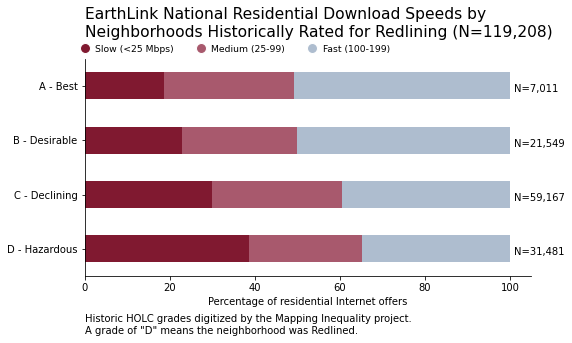

In [28]:
redlining(el, isp='EarthLink')

atlanta GA 9208 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


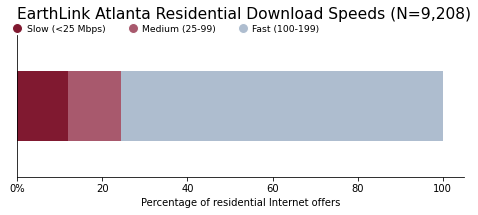

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


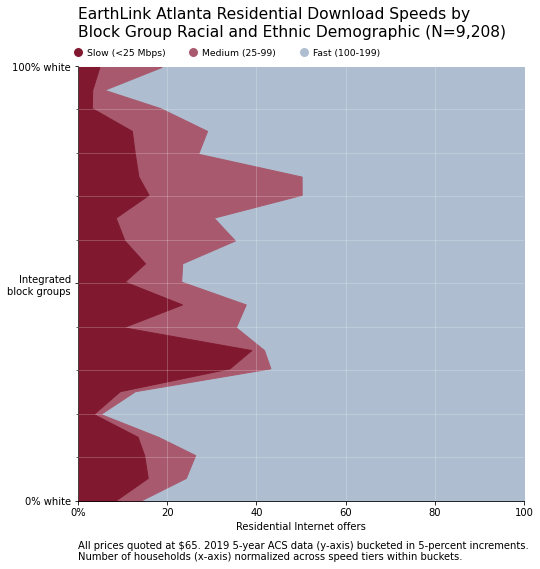

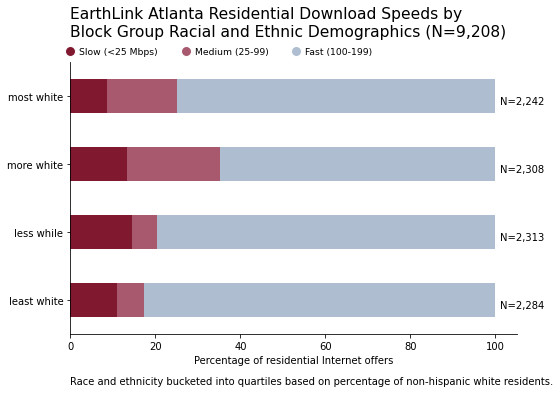

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


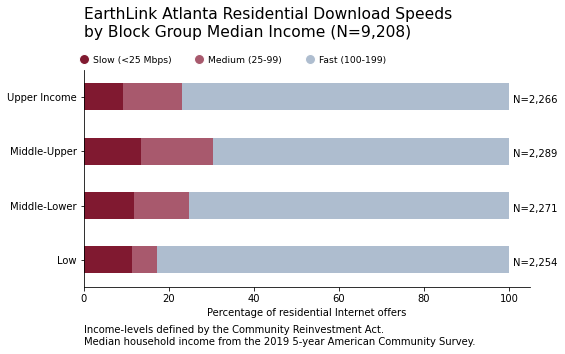

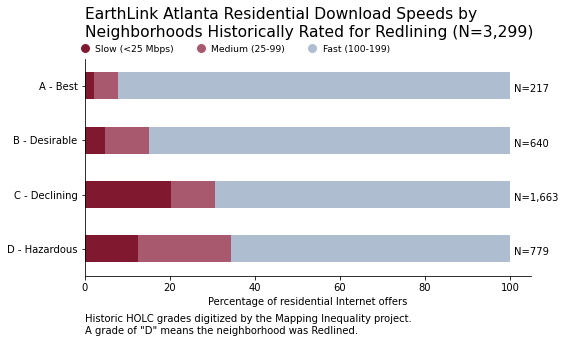

*******************************************************************************
charleston SC 3132 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


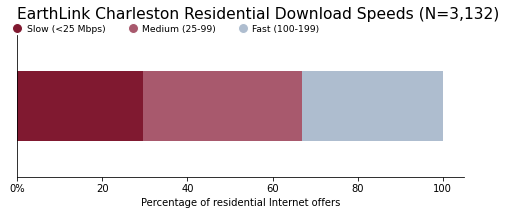

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


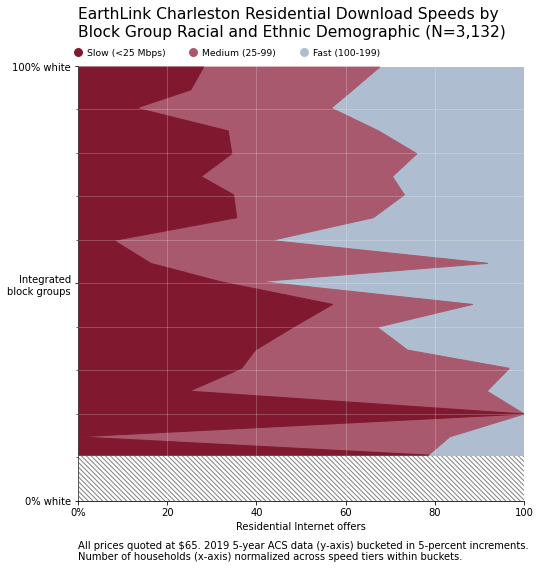

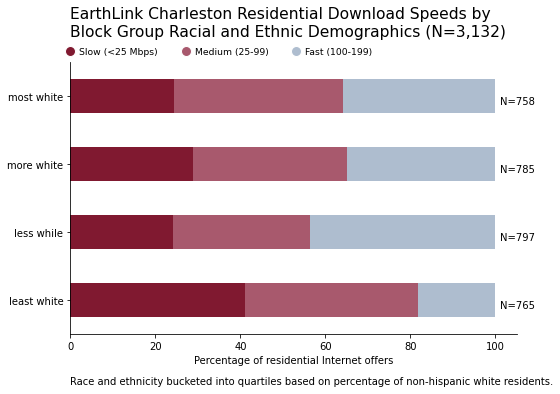

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


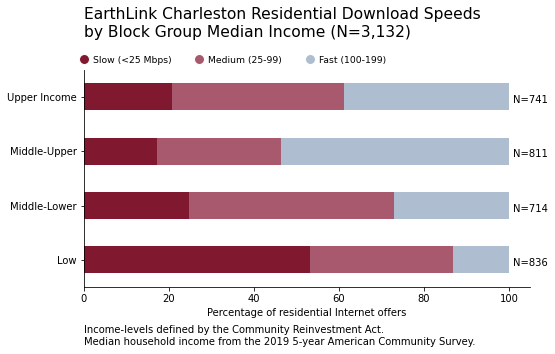

*******************************************************************************
charlotte NC 15222 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


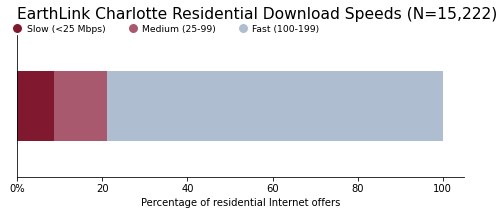

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


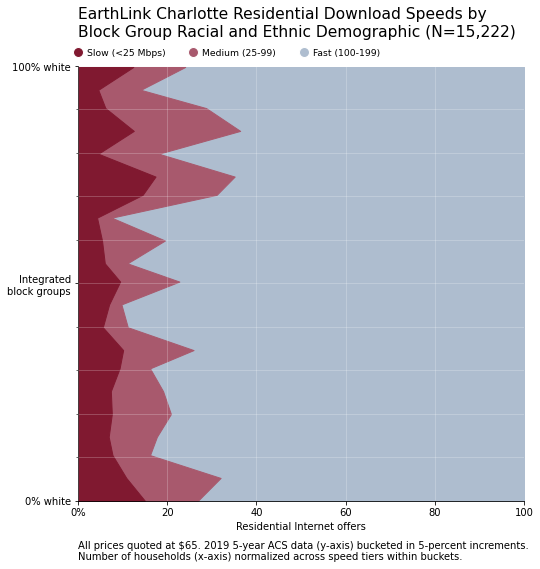

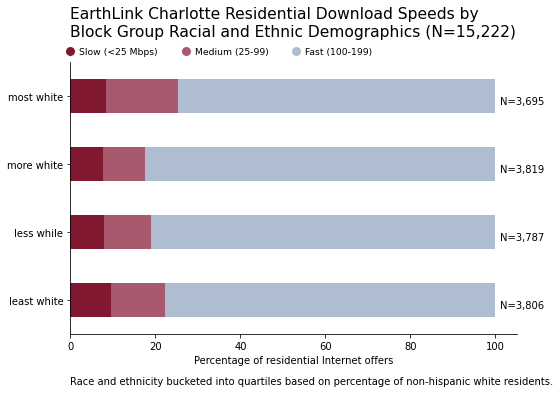

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


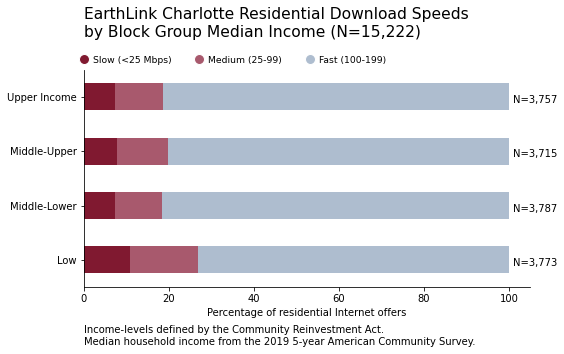

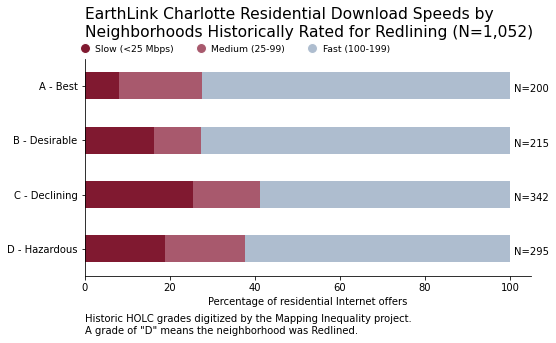

*******************************************************************************
chicago IL 27829 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


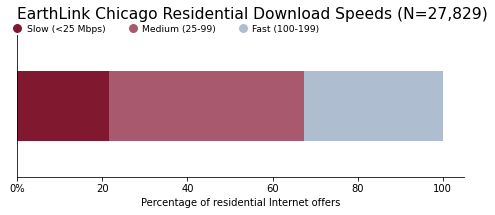

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


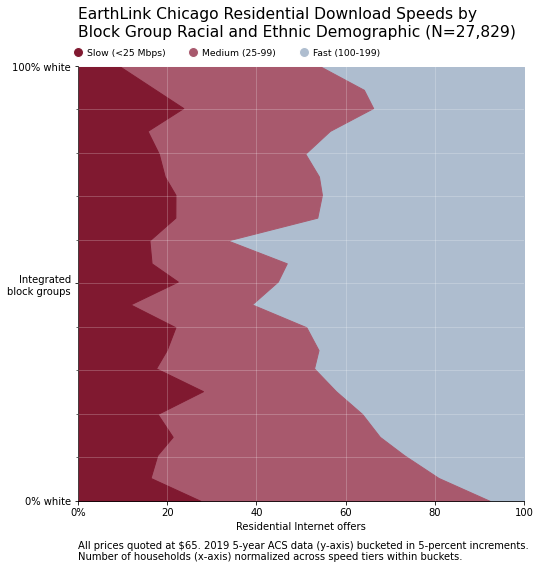

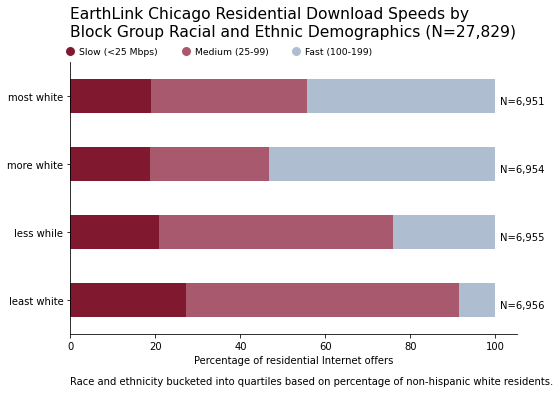

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


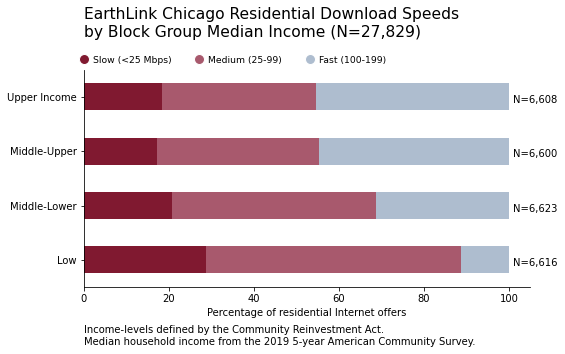

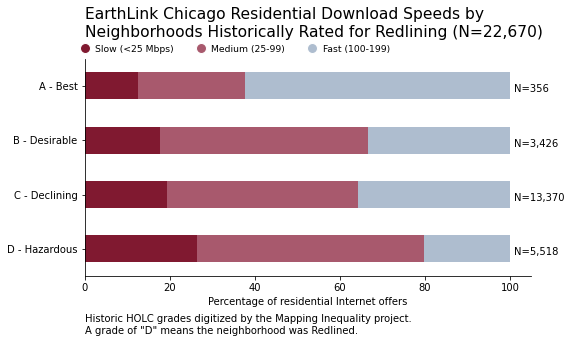

*******************************************************************************
columbus OH 22597 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


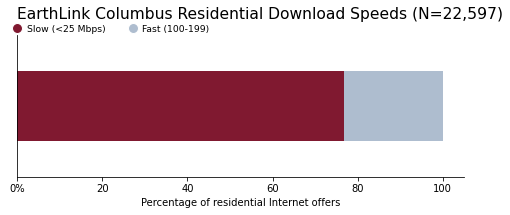

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


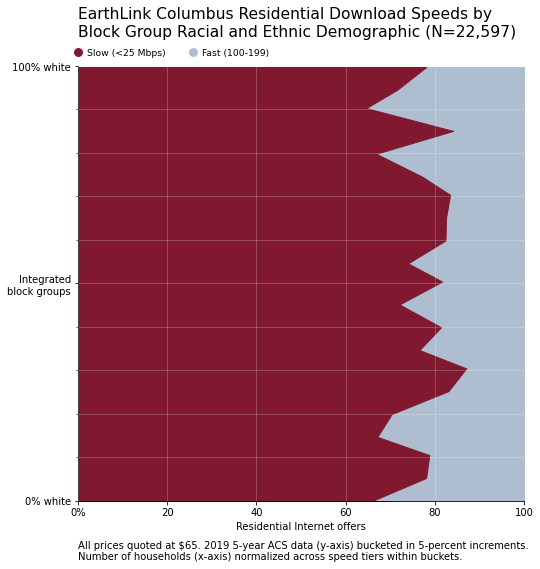

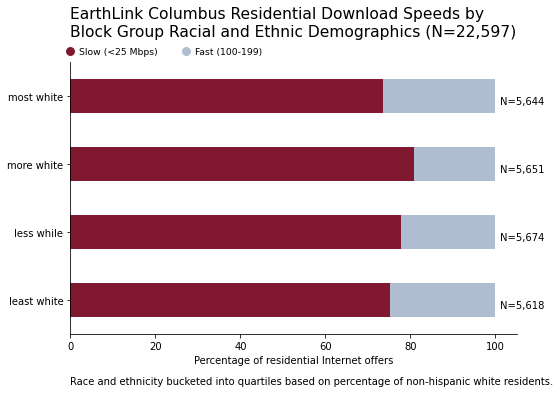

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


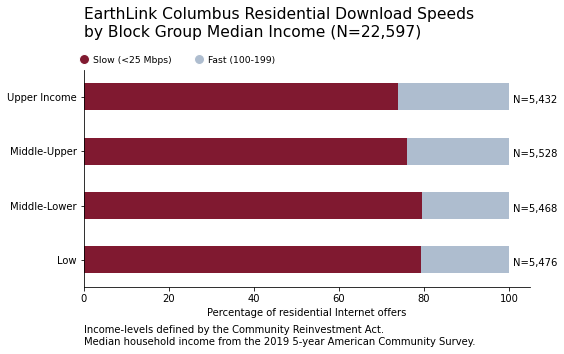

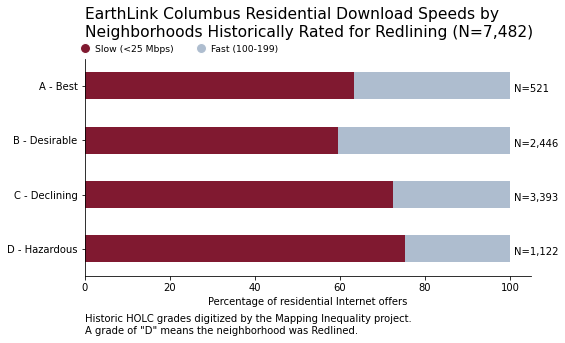

*******************************************************************************
detroit MI 19765 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


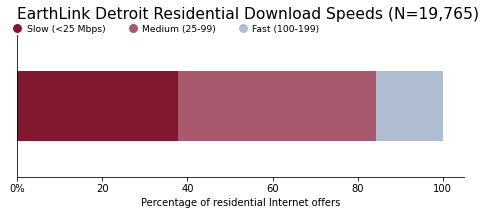

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


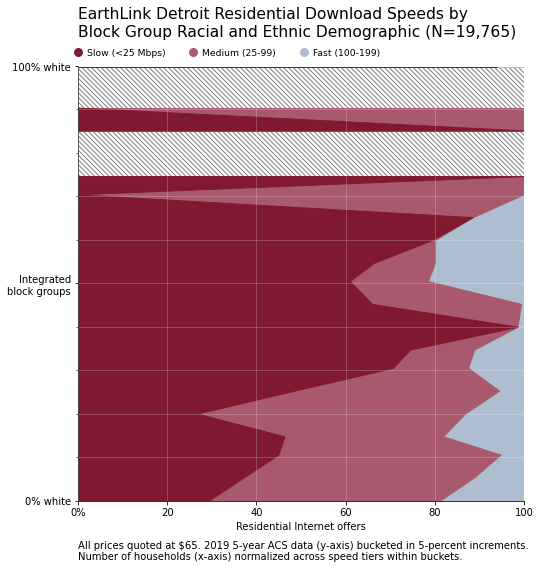

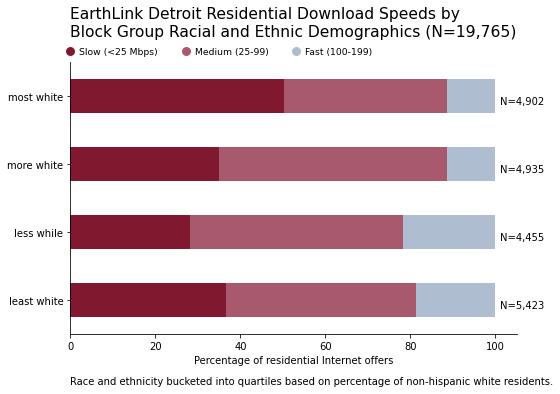

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


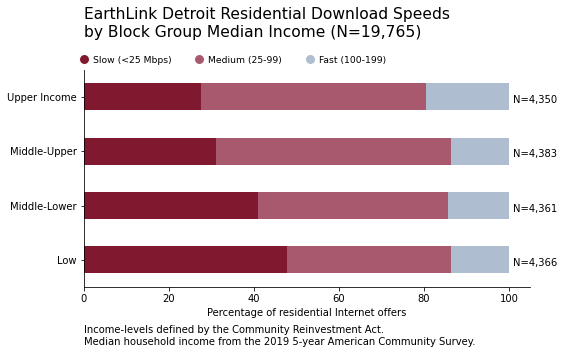

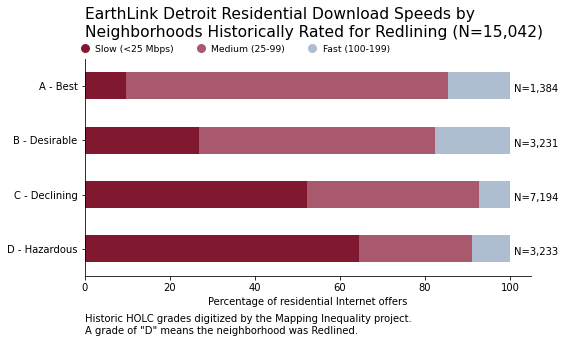

*******************************************************************************
houston TX 45981 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


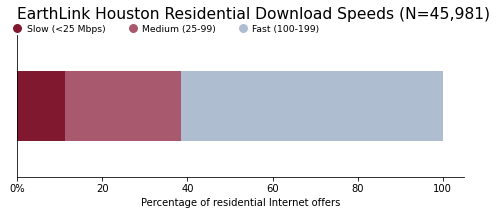

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


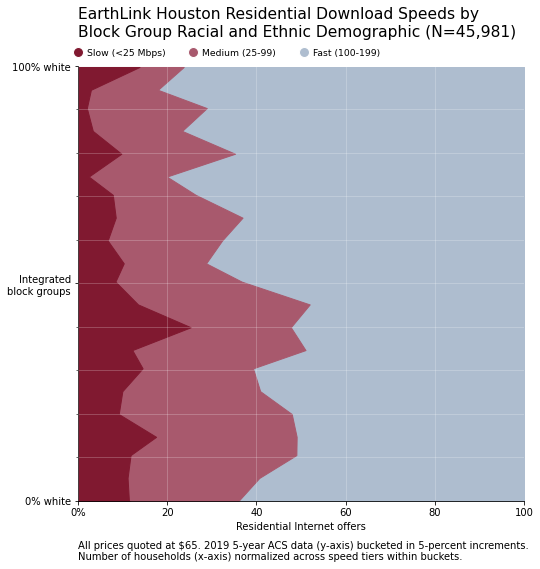

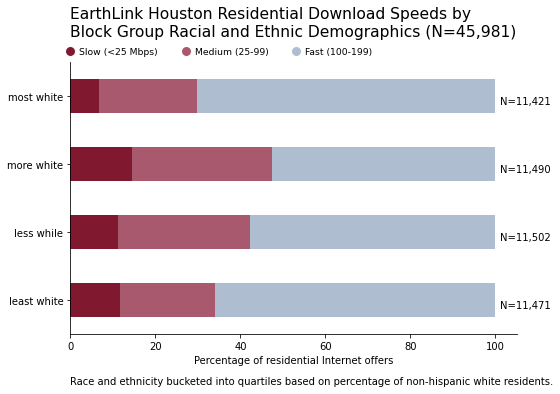

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


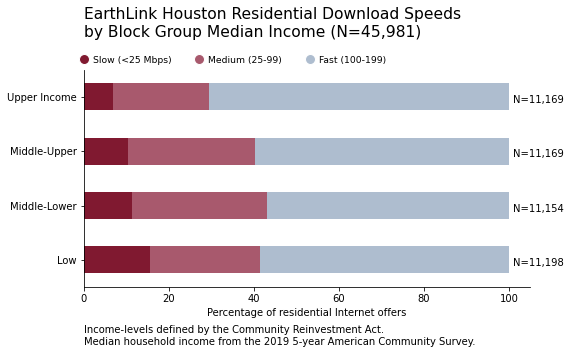

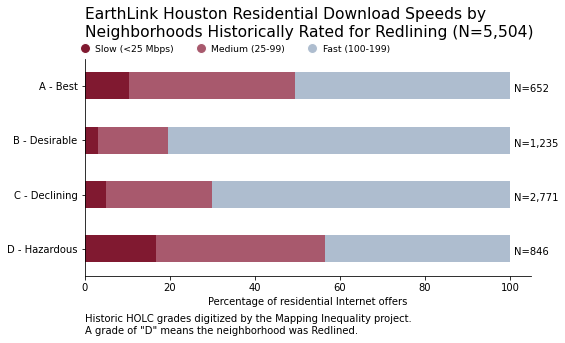

*******************************************************************************
huntsville AL 3789 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


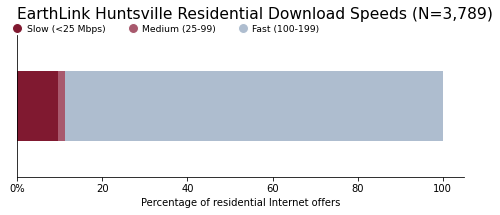

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


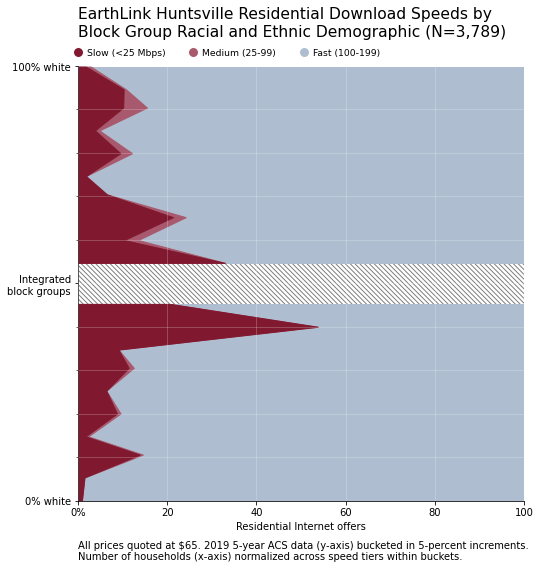

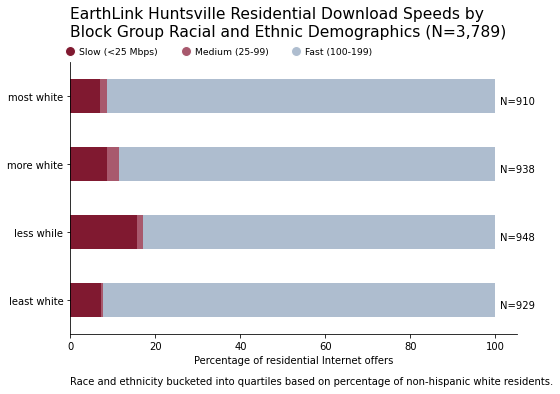

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


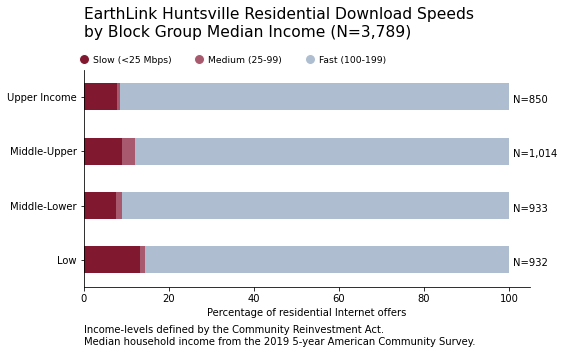

*******************************************************************************
indianapolis IN 10645 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


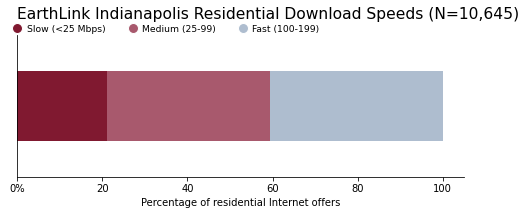

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


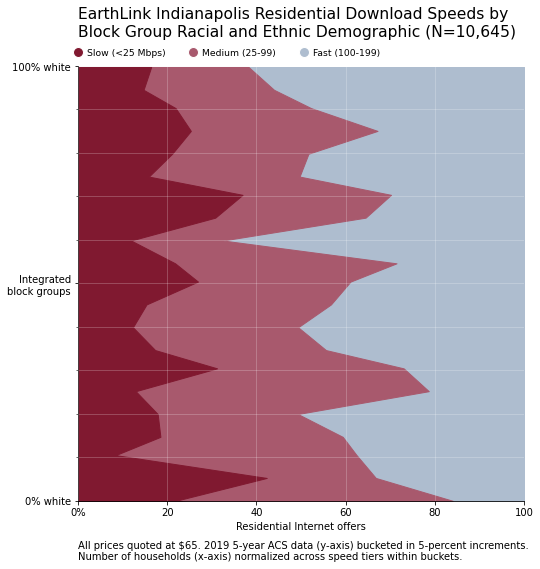

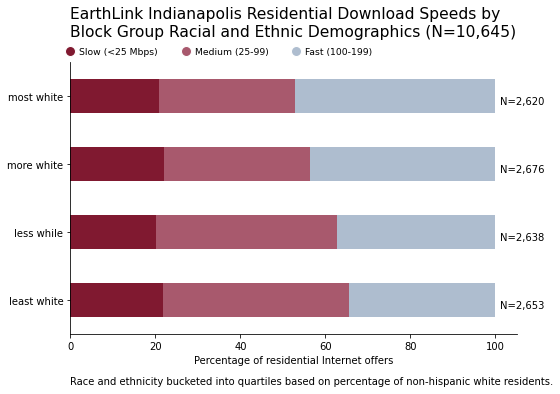

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


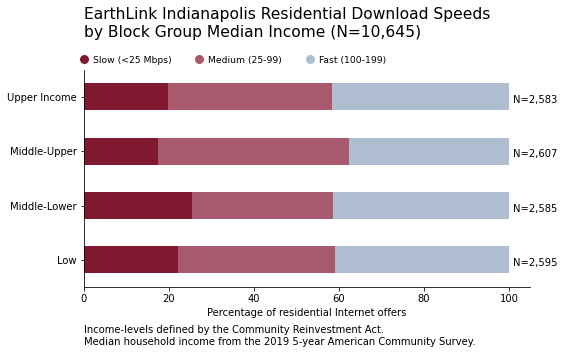

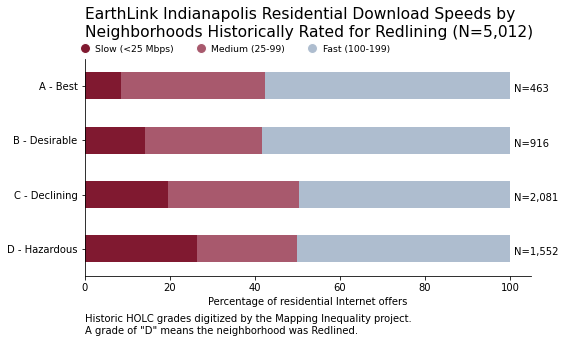

*******************************************************************************
jacksonville FL 18273 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


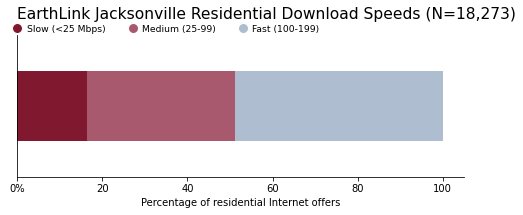

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


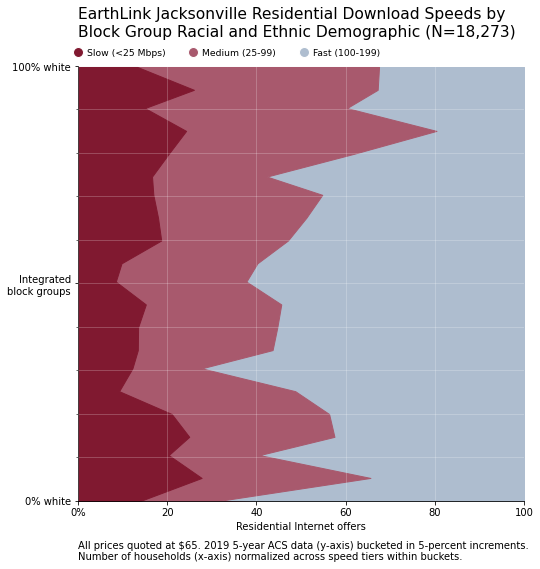

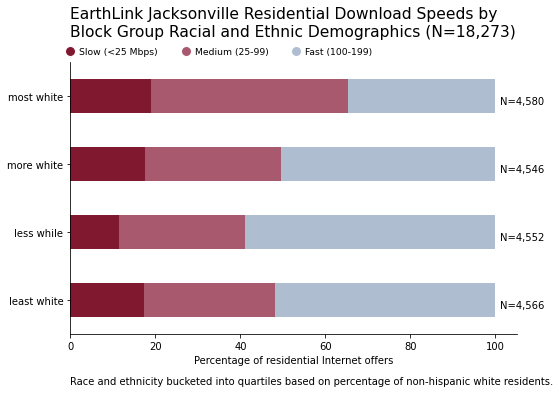

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


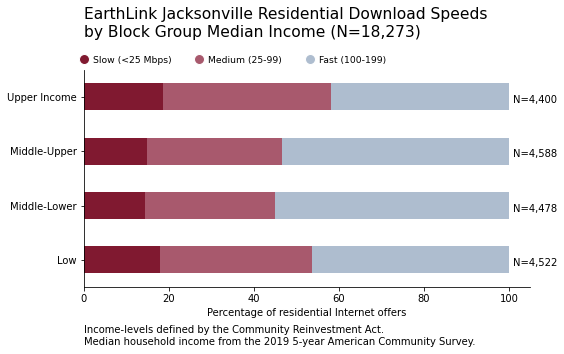

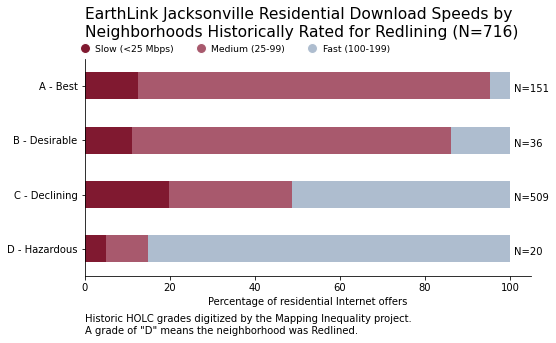

*******************************************************************************
kansas city MO 13405 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


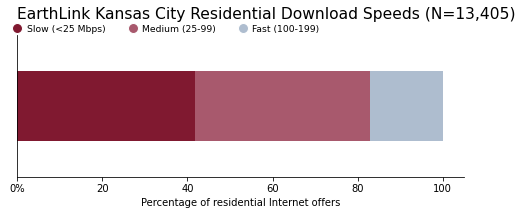

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


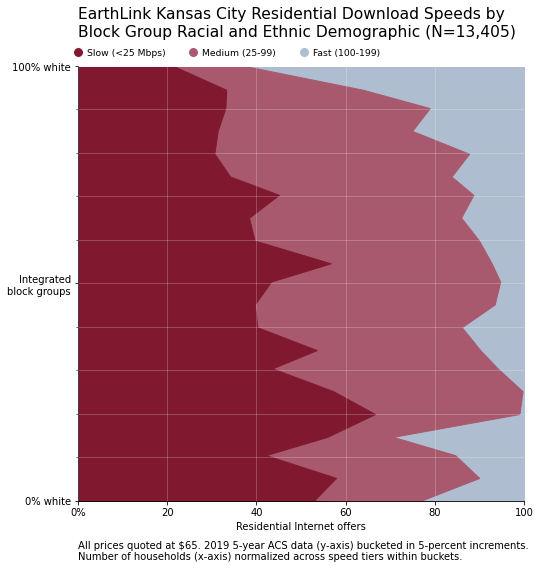

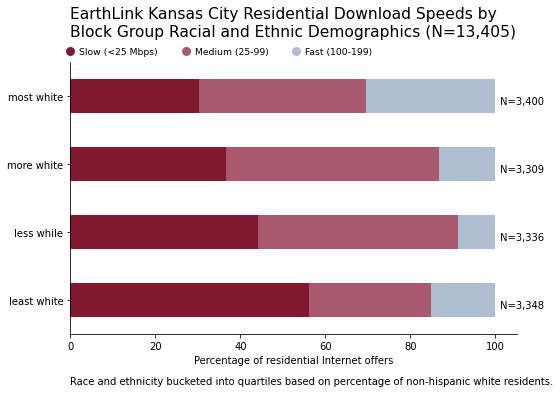

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


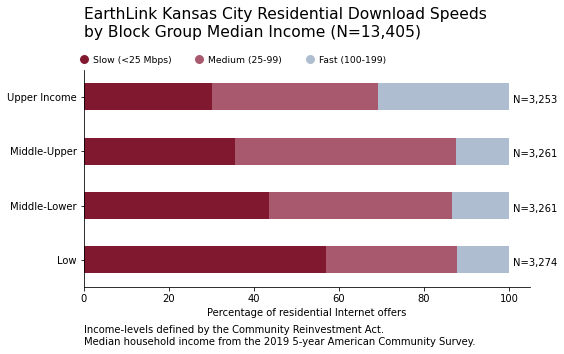

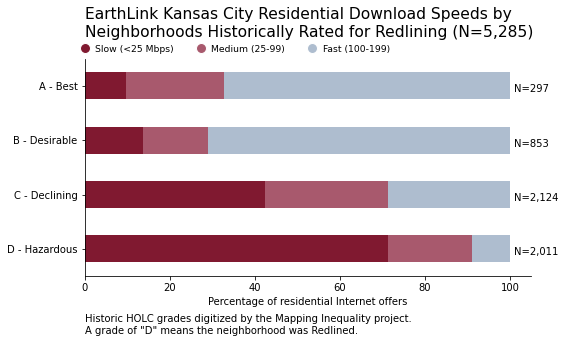

*******************************************************************************
little rock AR 5290 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


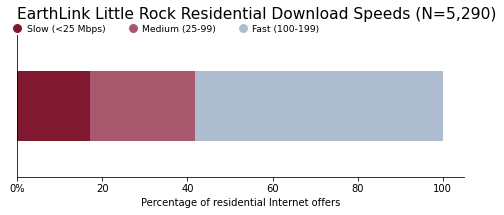

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


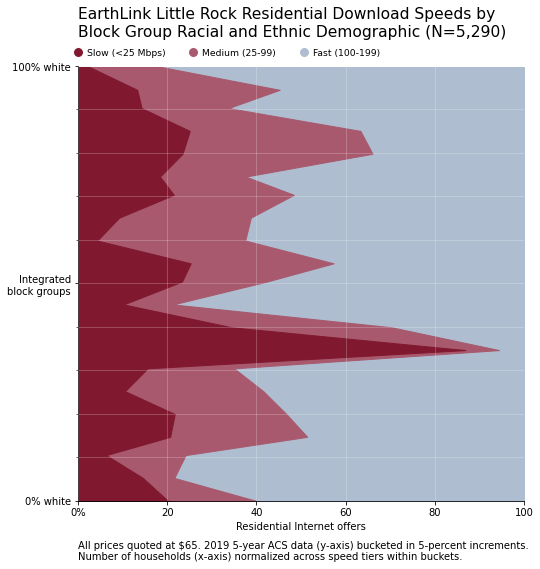

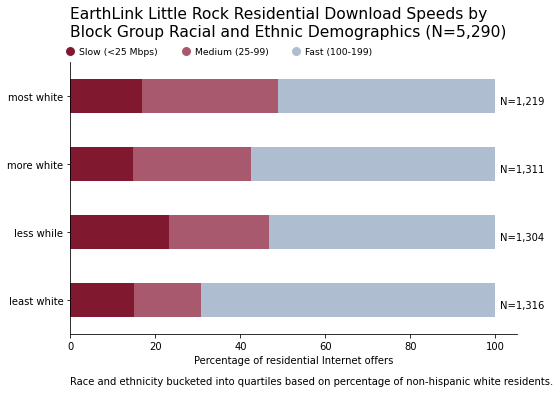

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


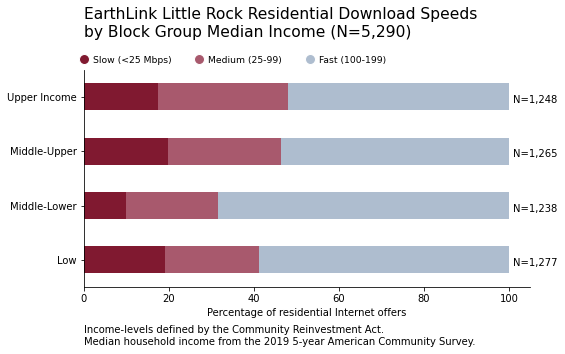

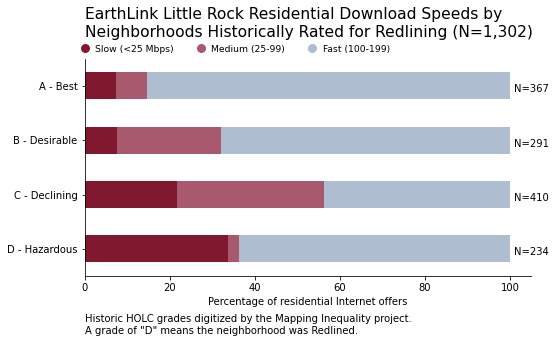

*******************************************************************************
los angeles CA 30510 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


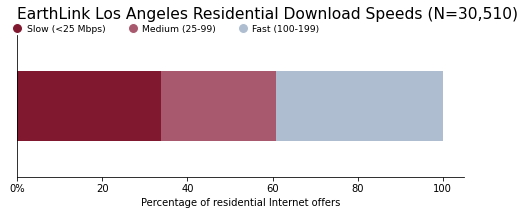

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


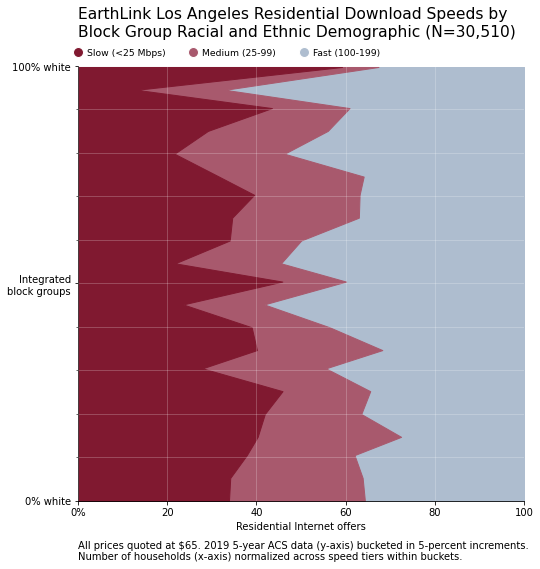

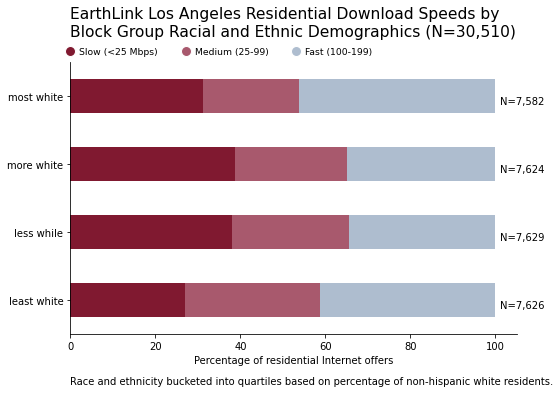

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


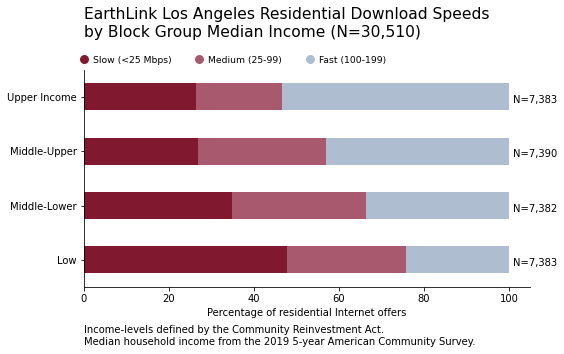

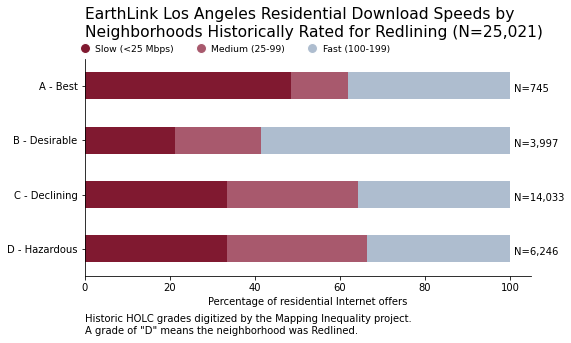

*******************************************************************************
louisville KY 7821 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


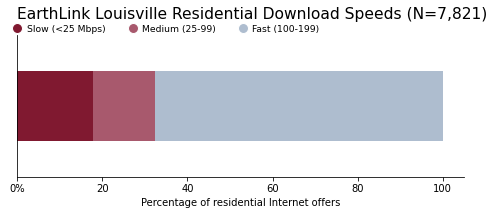

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


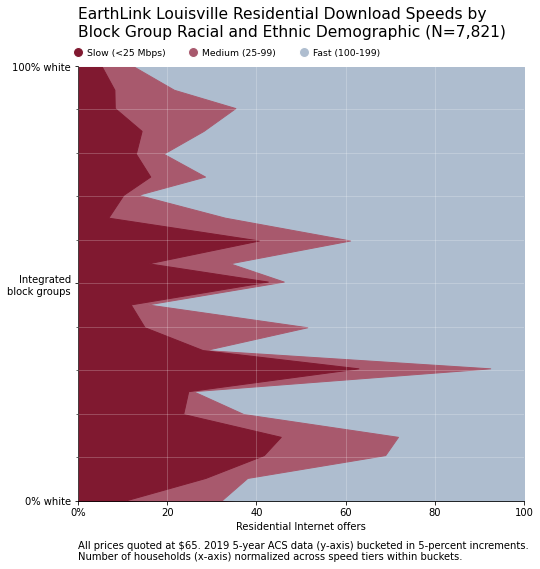

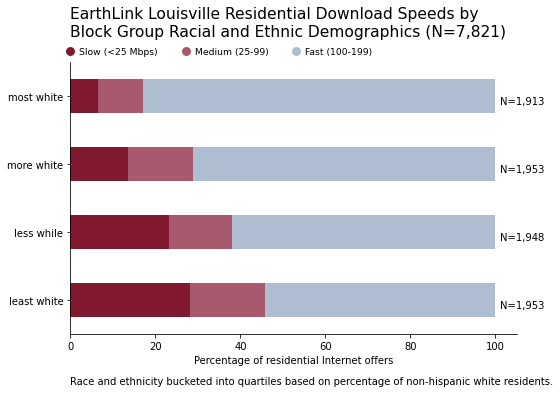

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


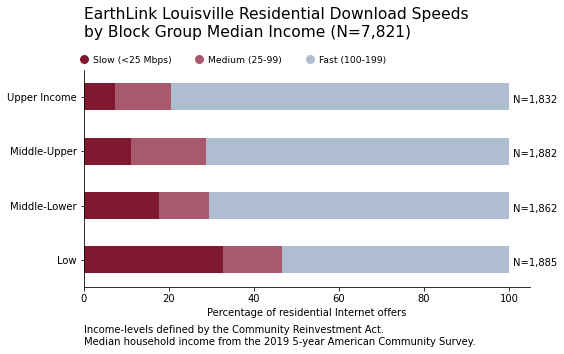

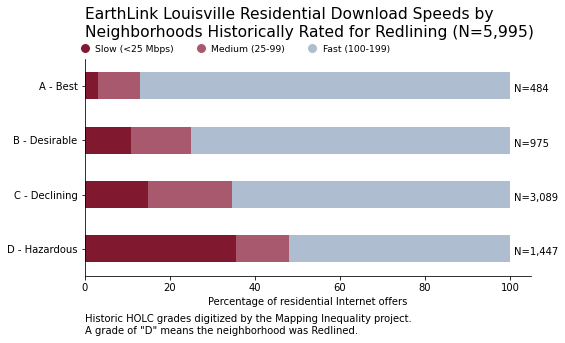

*******************************************************************************
milwaukee WI 13031 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


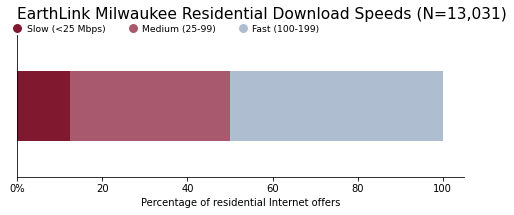

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


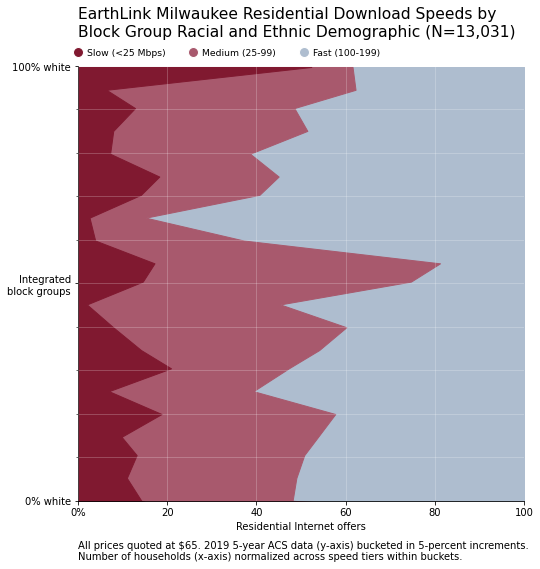

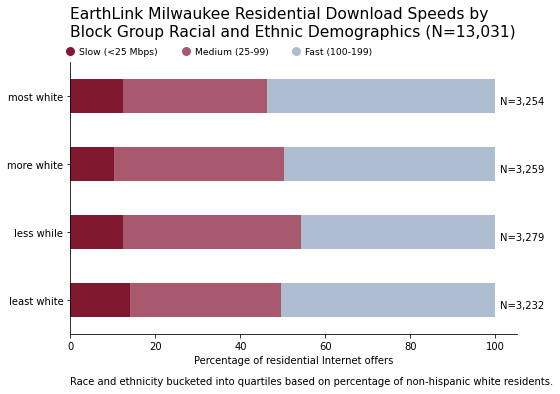

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


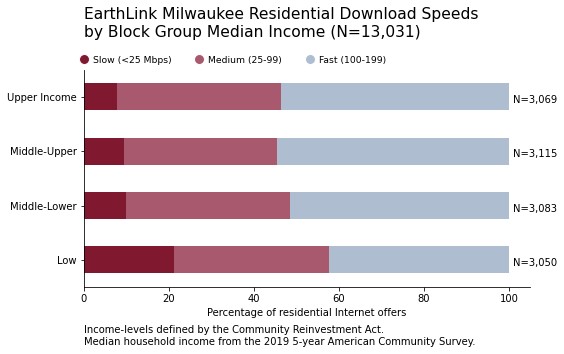

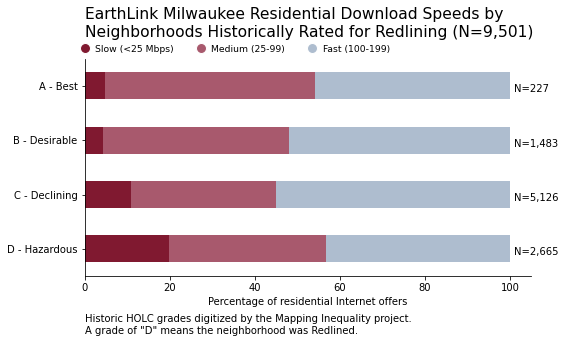

*******************************************************************************
nashville TN 8245 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


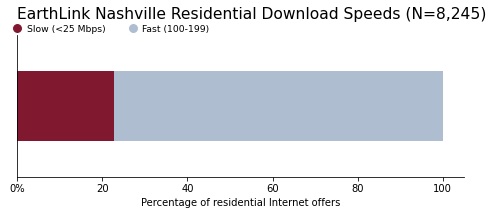

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


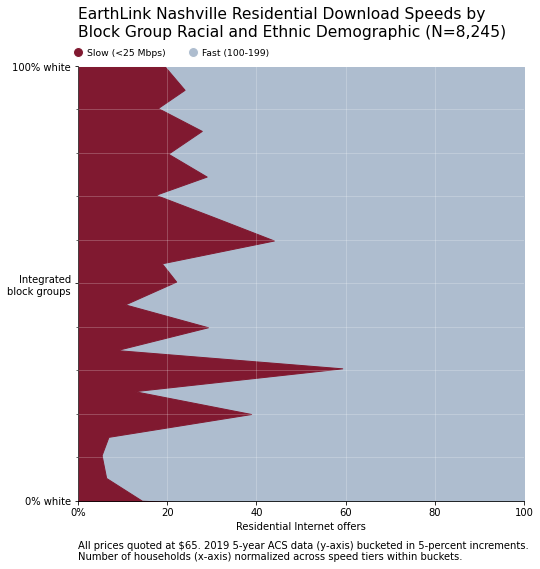

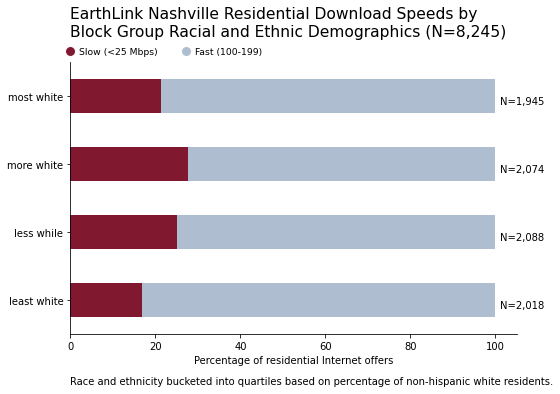

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


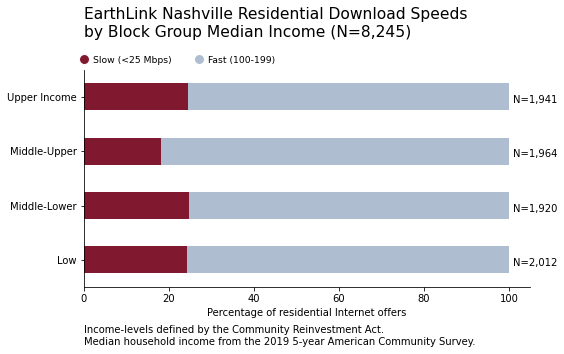

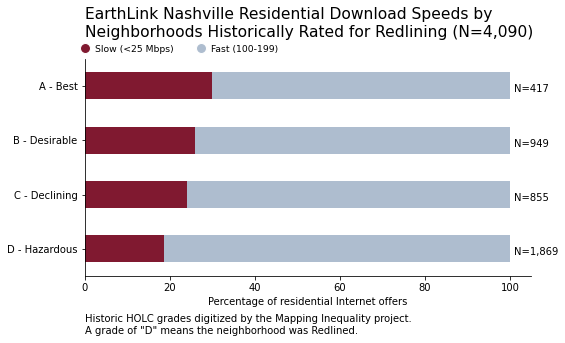

*******************************************************************************
new orleans LA 7370 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


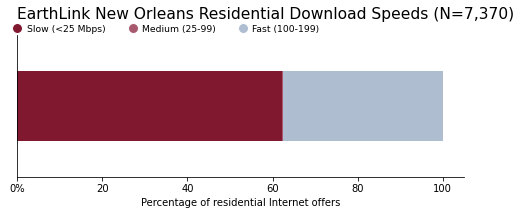

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


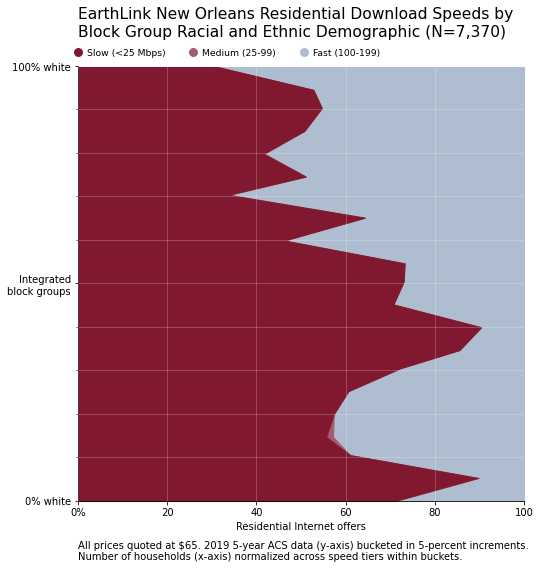

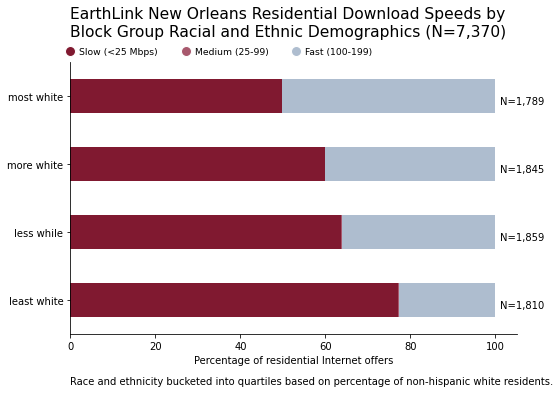

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


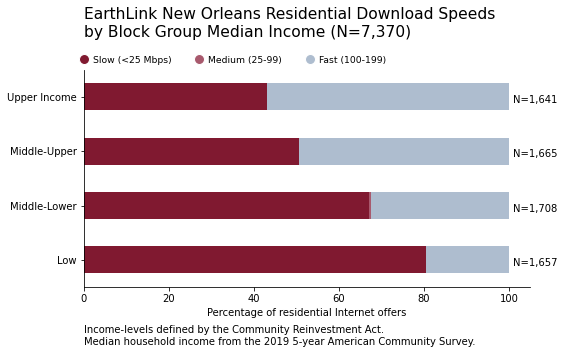

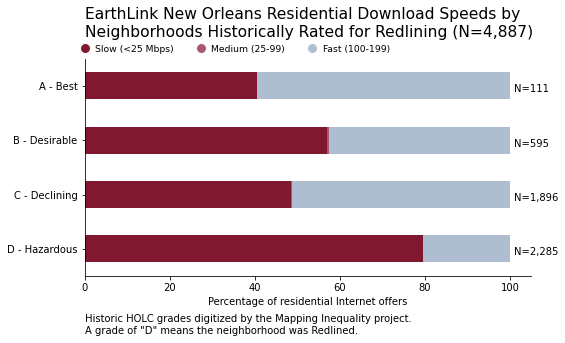

*******************************************************************************
oklahoma city OK 13654 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


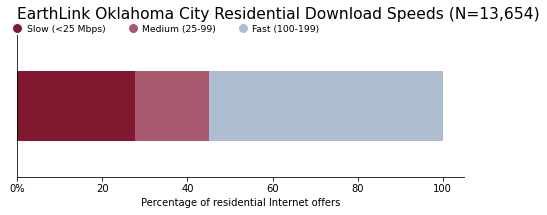

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


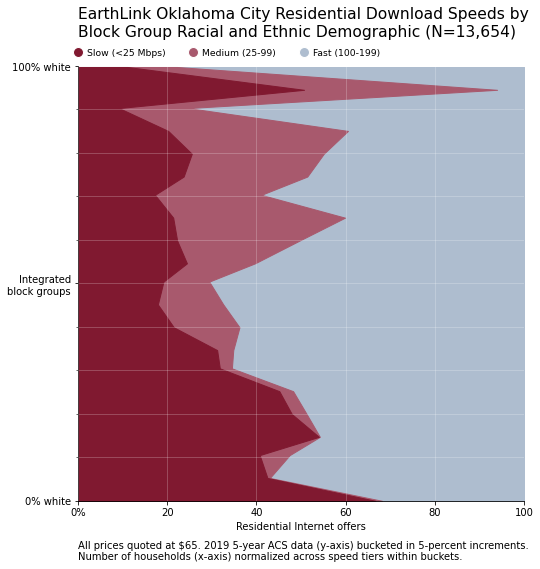

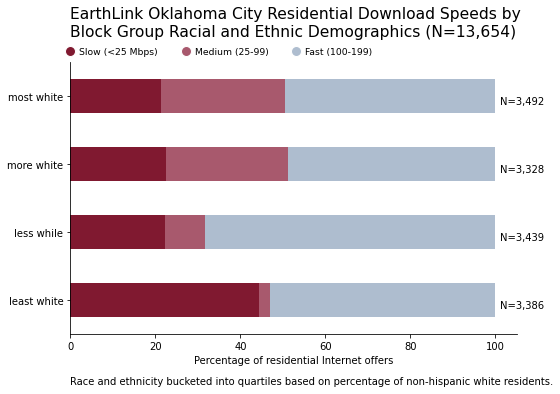

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


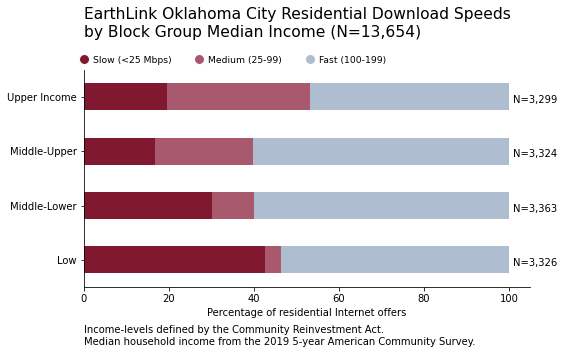

*******************************************************************************
wichita KS 10195 AT&T


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


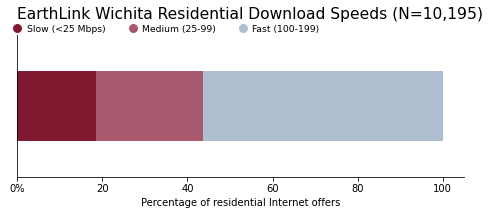

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


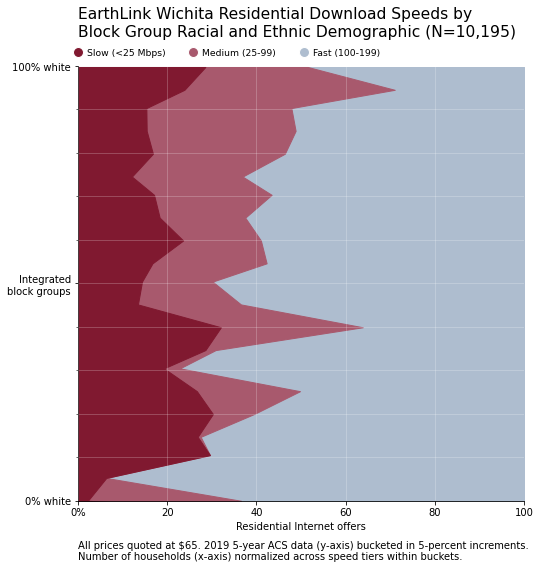

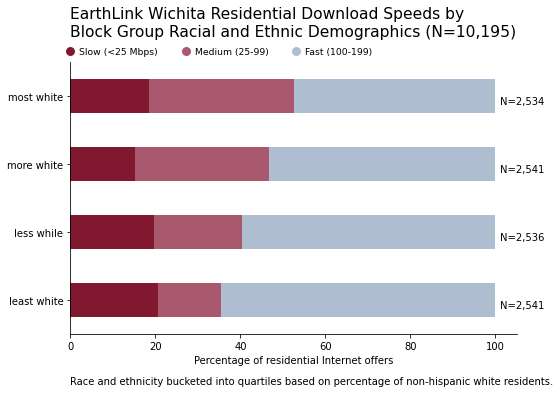

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


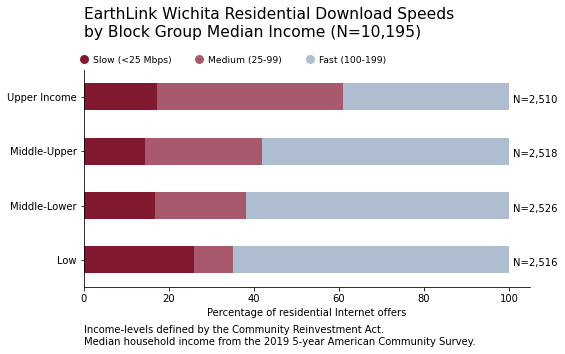

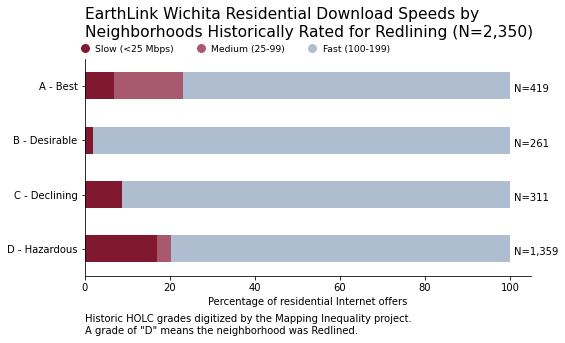

*******************************************************************************


In [29]:
for (city, state), _df in el.groupby(['major_city', 'state']):
    main_contractor = _df.contract_provider.value_counts().index[0]
    _df = bucket_and_bin(_df)
    print(city, state, len(_df), main_contractor)
    speed_breakdown(_df, location=city.title(), isp='EarthLink')
    plot_race(_df, location=city.title(), isp='EarthLink', price='$65')
    race(_df, location=city.title(), isp='EarthLink')
    income(_df, location=city.title(), isp='EarthLink')
    redlining(_df, location=city.title(), isp='EarthLink')
    print("*" * 79)

In [42]:
el[el.major_city == 'nashville'].speed_down.value_counts()

100.0    6377
12.0     1409
6.0       242
3.0       217
Name: speed_down, dtype: int64